In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'netflix_titles.csv'
netflix_df = pd.read_csv(file_path)

In [ ]:
# Clean up any missing 'rating' values, as they are crucial for this analysis
netflix_df.dropna(subset=['rating'], inplace=True)


In [5]:
# Identify the top N ratings to focus our analysis for clarity
# Let's pick the top 6 most frequent ratings for a good balance
top_ratings = netflix_df['rating'].value_counts().head(6).index.tolist()


In [ ]:
# Filter the DataFrame to include only these top ratings
filtered_df = netflix_df[netflix_df['rating'].isin(top_ratings)].copy()


In [13]:
# Now, group by release_year, type, and rating, then count the occurrences
# This creates our multi-dimensional data for plotting

content_breakdown = filtered_df.groupby(['release_year','type','rating'])\
                               .size().reset_index(name='count')

In [ ]:
# Filter for content released from 2000 onwards for a clearer view of modern trends

content_breakdown = content_breakdown[content_breakdown['release_year']\
                                      >= 2000]

In [ ]:
print("--- Sample of Multi-variate Data ---")
print(content_breakdown.head())
print(f"\nTop ratings included in analysis: {top_ratings}")


--- Sample of Multi-variate Data ---
     release_year   type rating  count
177          2000  Movie  PG-13     10
178          2000  Movie      R      8
179          2000  Movie  TV-14      5
180          2000  Movie  TV-MA      1
181          2000  Movie  TV-PG      3

Top ratings included in analysis: ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7']


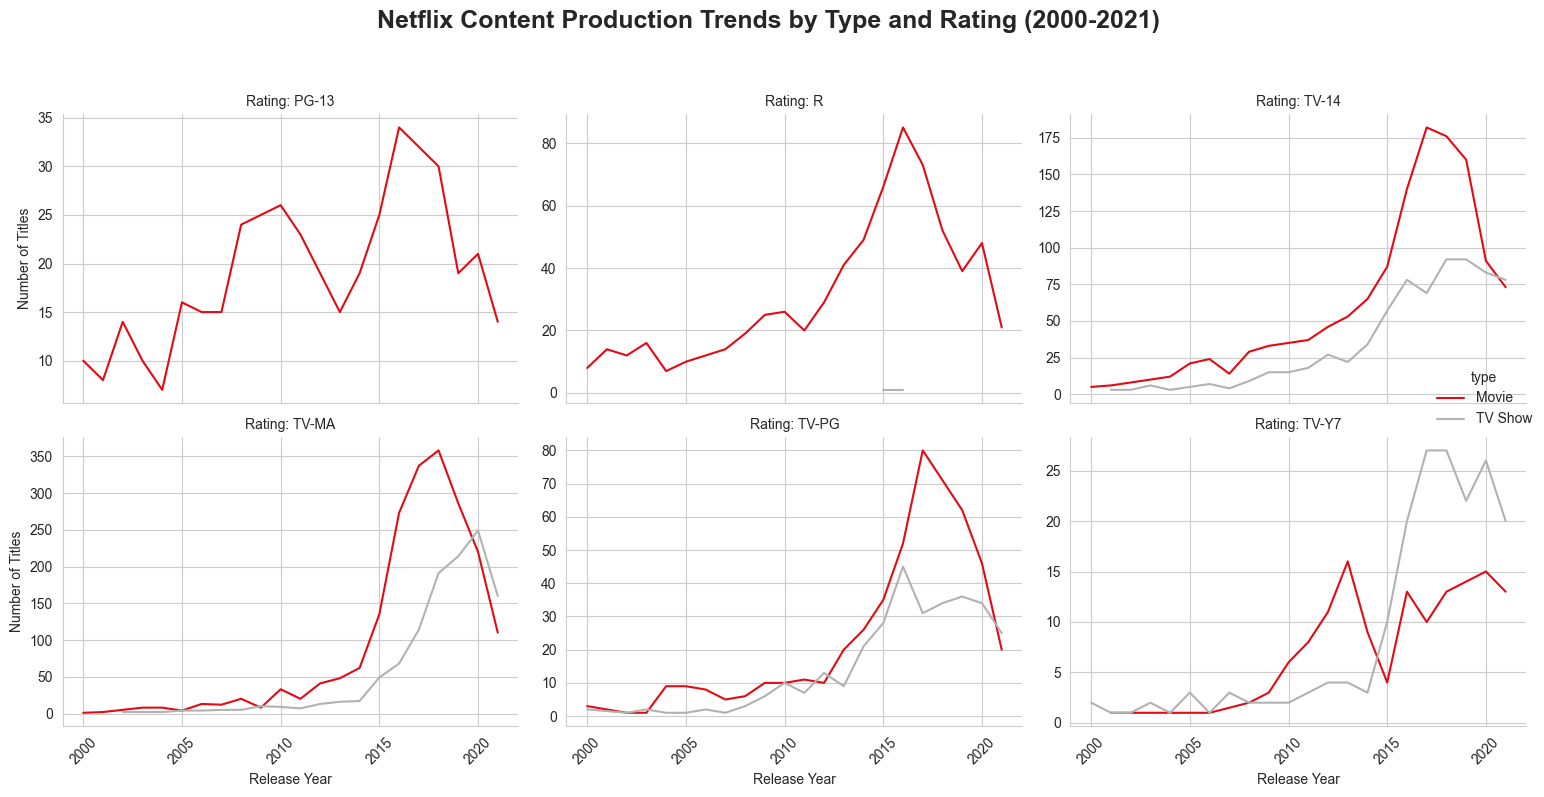

In [ ]:
# Set a clean and professional style for our plots
sns.set_style("whitegrid")

# Create the multi-dimensional plot
# We use kind='line' to show trends over time for each category
g = sns.relplot(
    data=content_breakdown,
    x='release_year',
    y='count',
    col='rating',        # Create separate columns for each rating
    hue='type',          # Differentiate Movies/TV Shows by color
    kind='line',         # Use lines to show trends over time
    col_wrap=3,          # Wrap columns after 3 plots for better layout
    height=4,            # Height of each subplot
    aspect=1.2,          # Aspect ratio of each subplot
    palette={'Movie': '#e50914', 'TV Show': '#b2b2b2'}, # Netflix-like colors
    facet_kws={'sharey': False, 'sharex': True} # Allow y-axes to vary, but keep x-axis consistent
)

# Adjust titles and labels for clarity
g.set_axis_labels("Release Year", "Number of Titles")
g.set_titles("Rating: {col_name}")
g.fig.suptitle("Netflix Content Production Trends by Type and Rating (2000-2021)", fontsize=18, fontweight='bold', y=1.02)

# Rotate x-axis labels for readability

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])                                      # Adjust layout to prevent title overlap
plt.show()


Text(0.5, 1.02, 'Netflix Content Production Trends by Type and Rating (2000-2021)')